In [1]:
import pandas as pd
import numpy as np
%load_ext rpy2.ipython
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [2]:
df = pd.read_csv('applications.csv', parse_dates=['Date Applied'])

In [4]:
df.sample(3)

,x,Dead(0)/Live(1),Company,Position Name,Date Applied,Last Contact,Via (website/ internal reconmmendation...),Cover Letter,Status,Final Status,Job Posting URL,Notes
58,NaN,0,NerdWallet,Data Analyst,2020-05-14,NaN,Angel.co,Yes,NaN,Rejected,NaN,NaN
168,NaN,0,Pivotal Software,Data Scientist,2020-06-16,NaN,Website,No,NaN,Elapsed,NaN,NaN
194,NaN,0,Tesla,Data Scientist,2020-06-19,NaN,Website,No,NaN,Elapsed,NaN,NaN


In [7]:
df = df.fillna('0')

In [11]:
df.columns = ['x', 'Dead_Live', 'Company', 'Position', 'Date_Applied', 'Last_Contact', 
              'Via', 'Cover_Letter', 'Status', "Final_Status", 'URL', 'Notes']

In [50]:
%R -i df

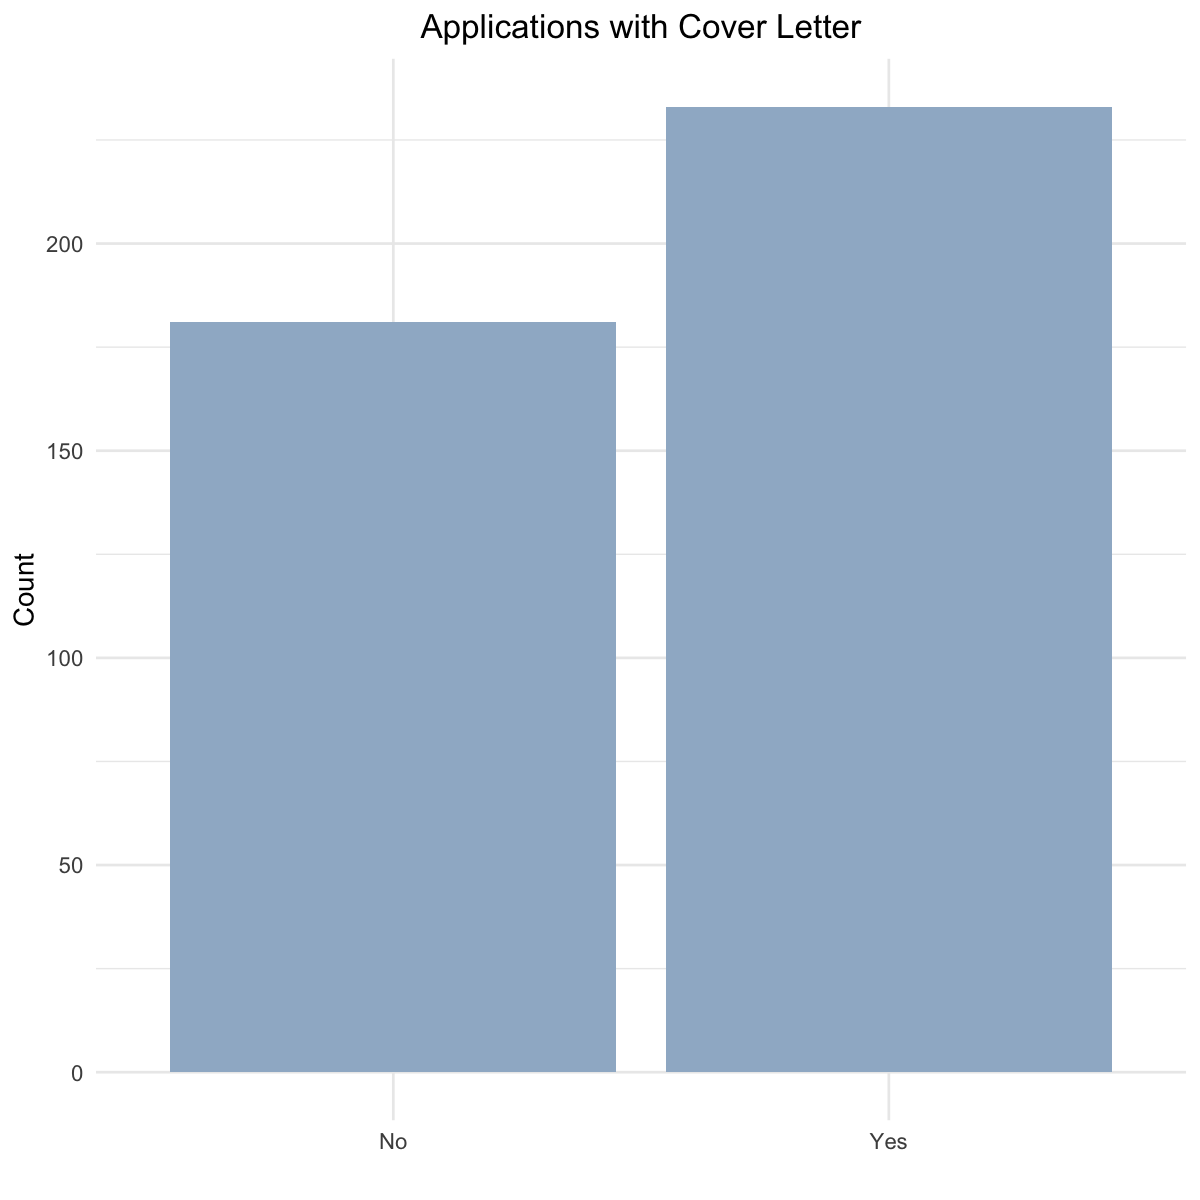

In [65]:
%%R -w 3 -h 3 --units in -r 400

ggplot(df) + 
geom_bar(aes(x=Cover_Letter), fill='slategray3') +
labs(title = 'Applications with Cover Letter', y = 'Count', x = '') + 
theme_minimal(base_size=5) +
theme(plot.title = element_text(hjust = 0.5), legend.position = 'none')


In [57]:
df_filtered = df.loc[df['Position'].isin(['MLE', 'Data Scientist', 'Data Analyst','Data Engineer'])]

In [58]:
%R -i df_filtered

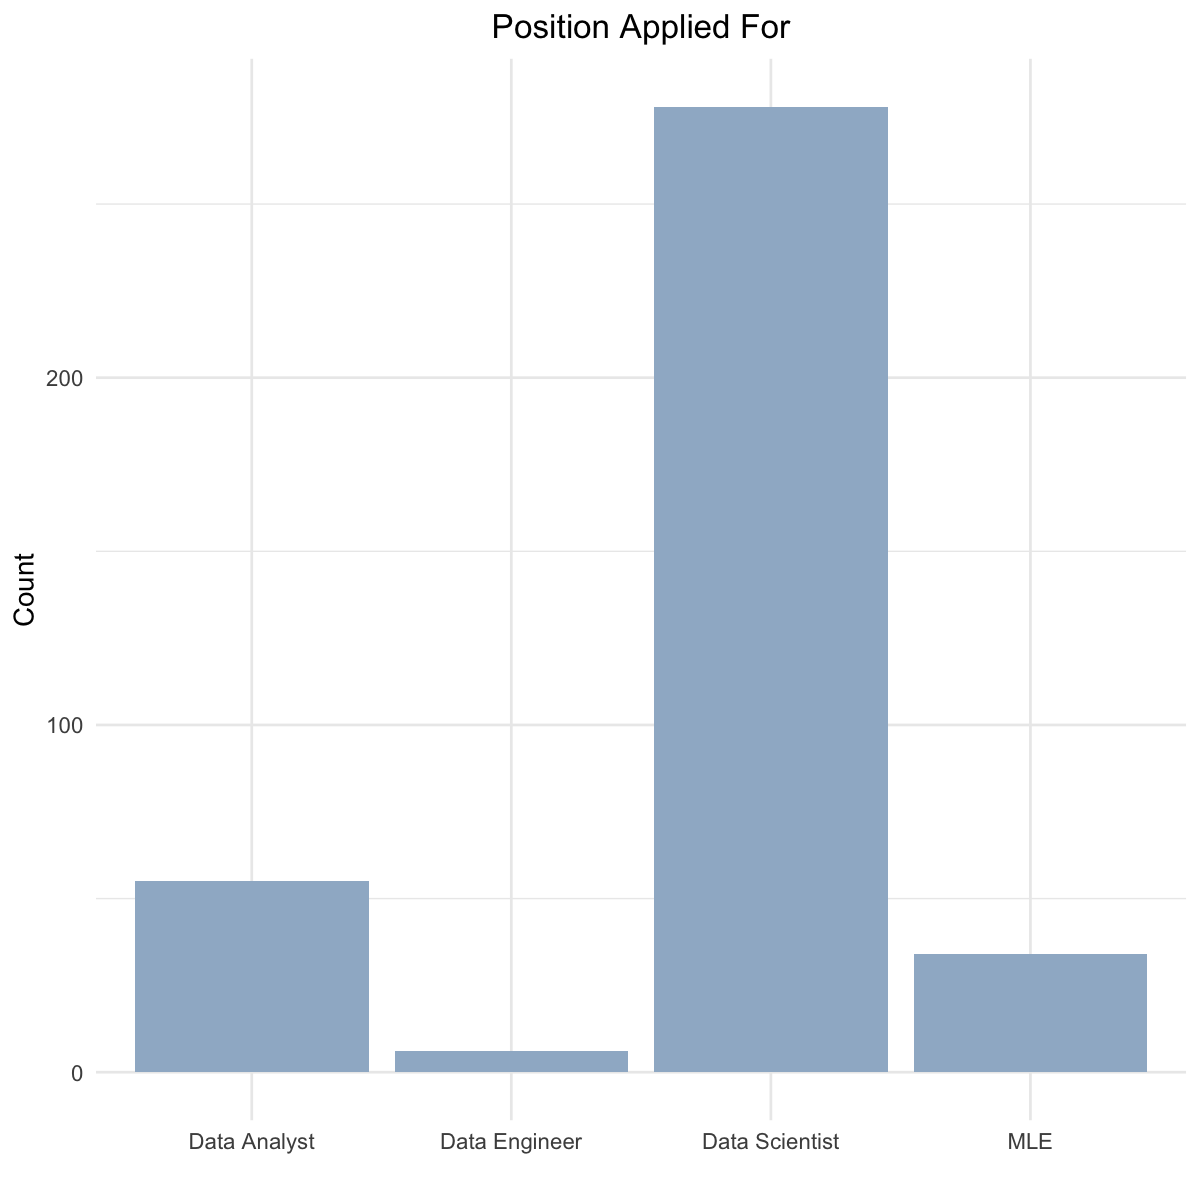

In [64]:
%%R -w 3 -h 3 --units in -r 400

ggplot(df_filtered) + 
geom_bar(aes(x=Position), fill='slategray3') +
labs(title = 'Position Applied For', y = 'Count', x = '') + 
theme_minimal(base_size=5) +
theme(plot.title = element_text(hjust = 0.5), legend.position = 'none')


In [36]:
count_df = df.groupby('Date_Applied').count().reset_index()

In [38]:
%R -i count_df

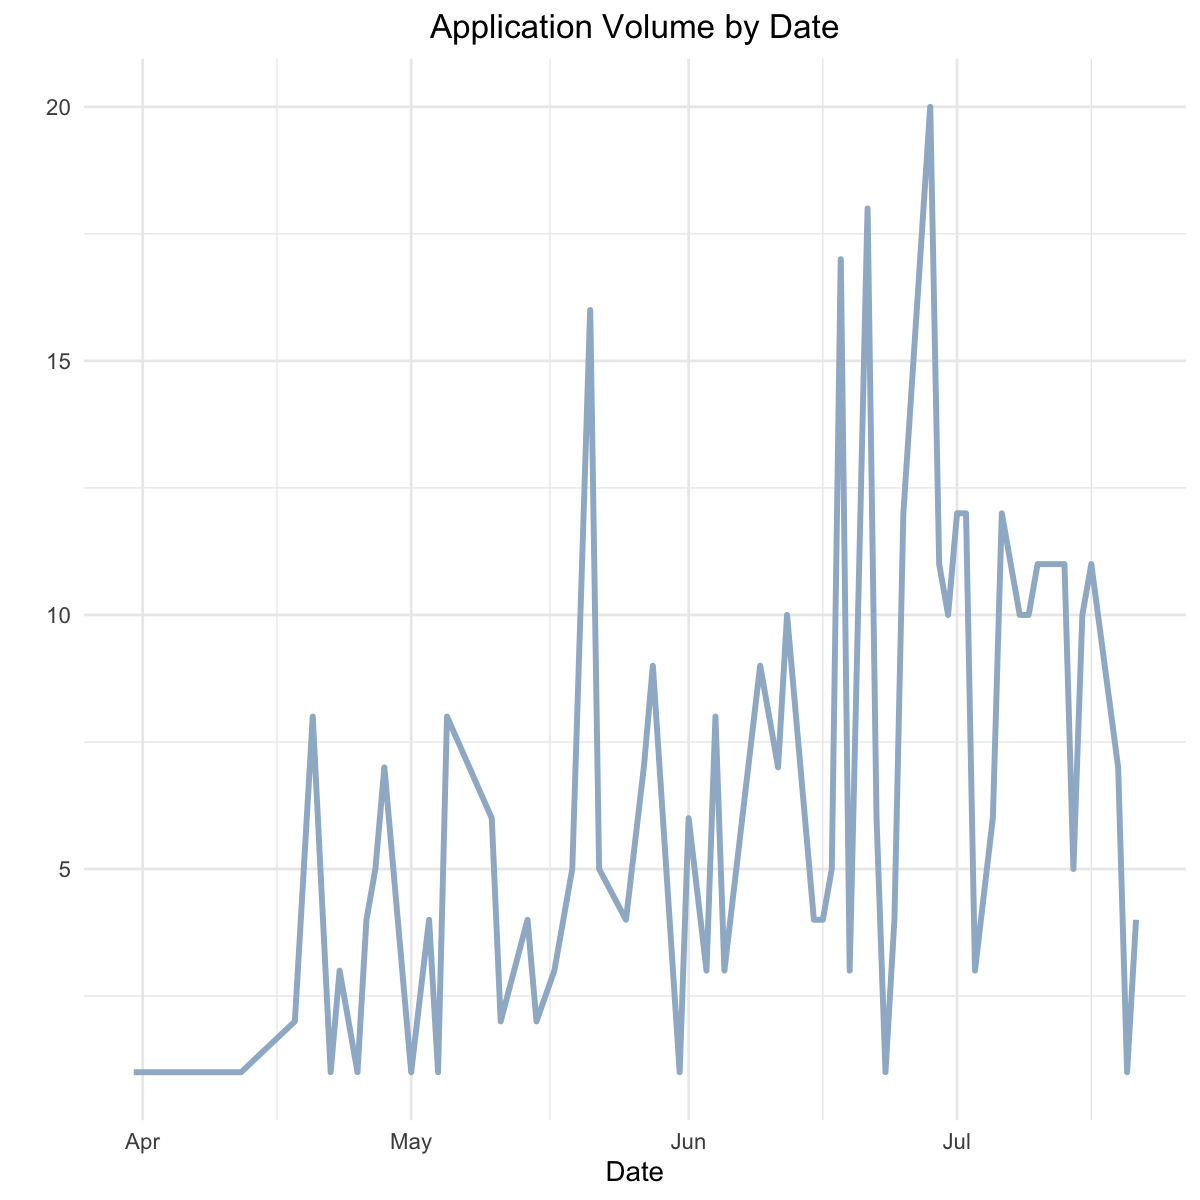

In [66]:
%%R -w 3 -h 3 --units in -r 400

ggplot() + 
geom_line(aes(x = Date_Applied, y = x), color='slategray3', size = 0.5, data = count_df) +
labs(title = 'Application Volume by Date', y = '', x = 'Date') + 
theme_minimal(base_size=5) +
theme(plot.title = element_text(hjust = 0.5), legend.position = 'none')